# Assignment 2: Ensemble Methods and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**


## Name: Jason Misquitta
## UNI: jm5906


## Dataset Description: Bank Marketing Dataset

This dataset contains information about direct marketing campaigns (phone calls) of a banking institution. The goal is to predict whether the client will subscribe to a term deposit. The details of the features and target are listed below:

**Features**:
- `age`: Age of the client
- `job`: Type of job
- `marital`: Marital status
- `education`: Education level
- `default`: Has credit in default?
- `balance`: Average yearly balance
- `housing`: Has housing loan?
- `loan`: Has personal loan?
- `contact`: Contact communication type
- `day`: Last contact day of the month
- `month`: Last contact month of year
- `duration`: Last contact duration in seconds
- `campaign`: Number of contacts performed during this campaign
- `pdays`: Number of days since the client was last contacted from a previous campaign
- `previous`: Number of contacts performed before this campaign
- `poutcome`: Outcome of the previous marketing campaign
- `deposit`: Has the client subscribed to a term deposit? (target)

**Objective**: The target variable (`deposit`) is binary (yes/no), and the goal is to predict whether a client will subscribe to a term deposit based on the given features.



In [4]:
## Use this cell to import necessary packages
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
import xgboost as xgb

## Question 1: Decision Trees


**1.1: Load the Bank Marketing Dataset and inspect its structure.**
- Hint: Inspect columns and types.


In [7]:
## YOUR CODE HERE

bank_df = pd.read_csv('D:/Academics/Subjects/AML/Datasets/bank.csv')
bank_df

print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [8]:
print(bank_df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  



**1.2: Are there any missing values in the dataset? If yes, how do you plan to handle them?**


In [10]:
## YOUR CODE HERE

print(len(bank_df))
missing_values = bank_df.isnull().sum()
print(missing_values)

11162
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [11]:
# There are no missing values present in the dataset, so no need for any handling.


**1.3: Plot side-by-side bars of class distribution for each categorical feature in the dataset with respect to the target variable (e.g., `job`, `marital`, `education`, etc.).**


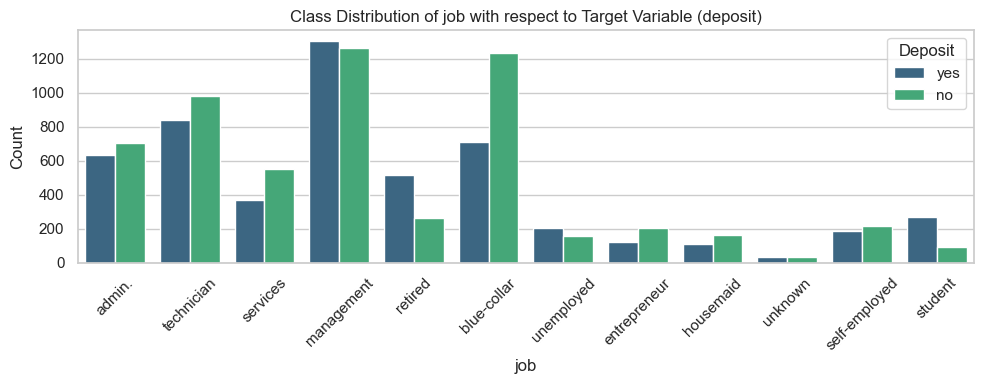

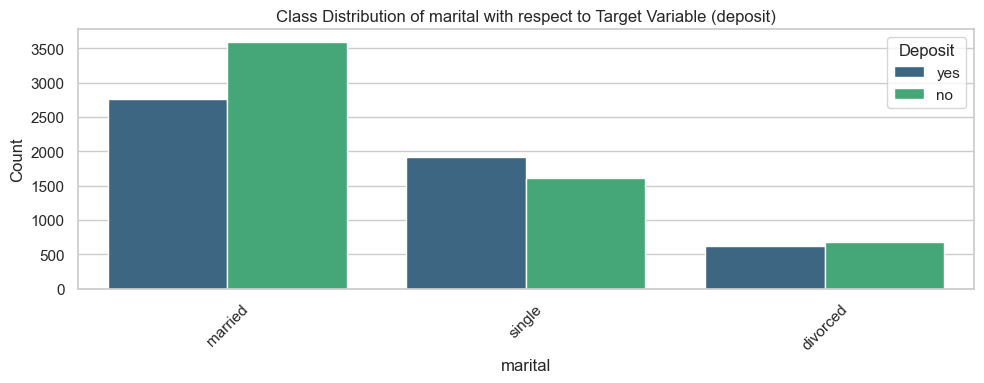

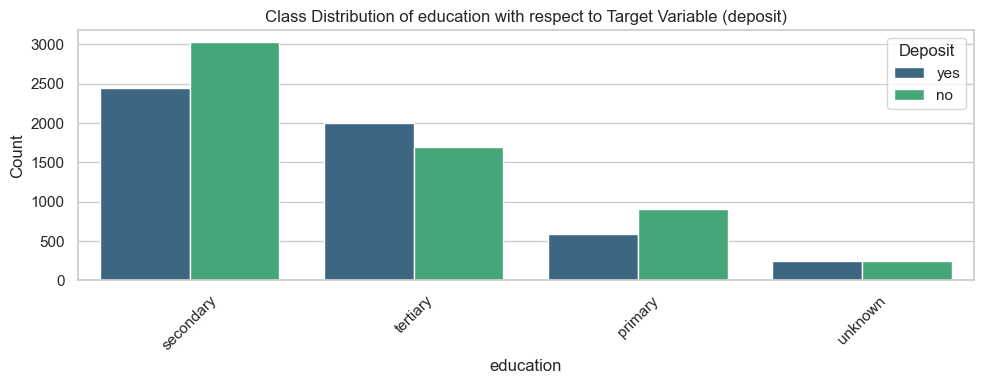

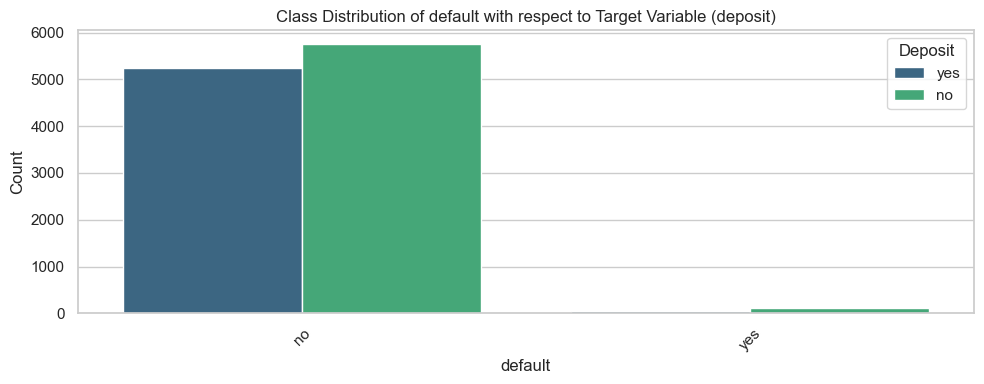

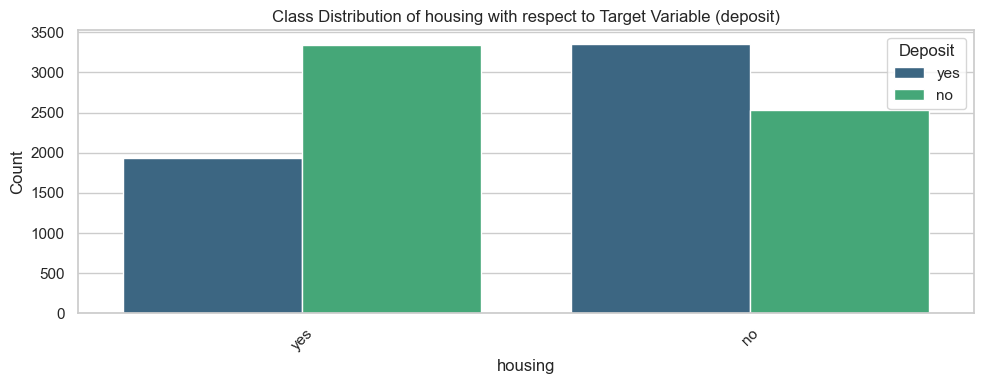

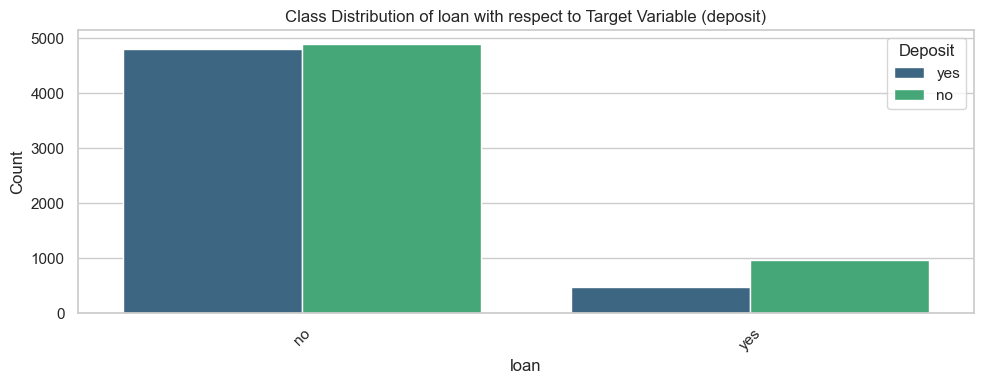

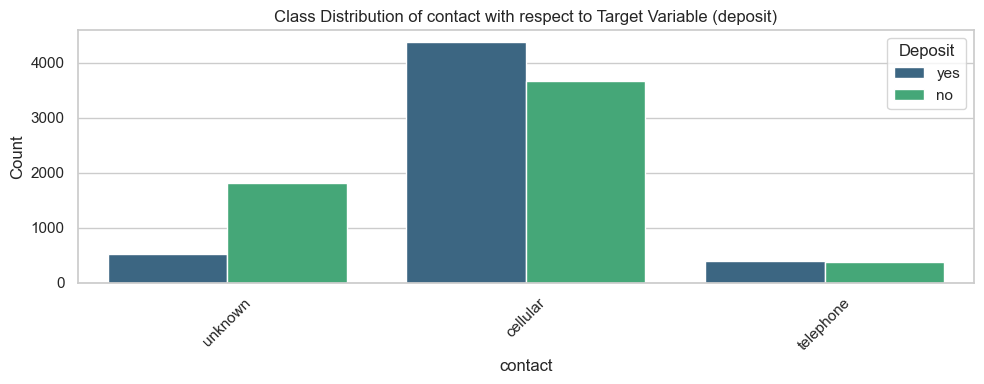

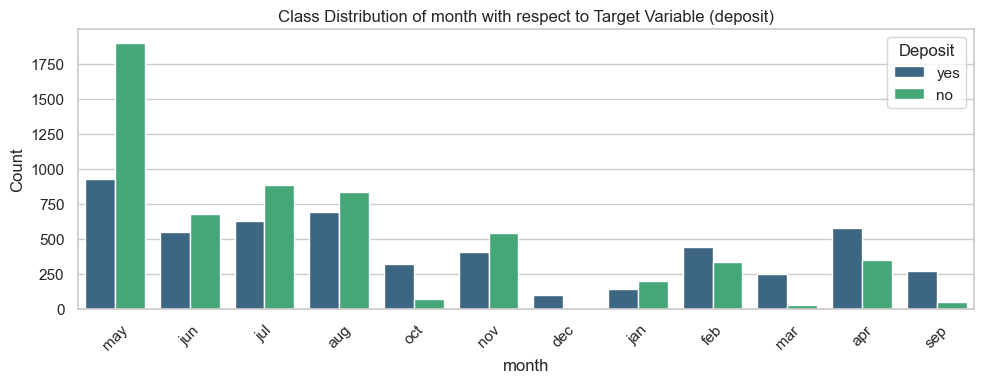

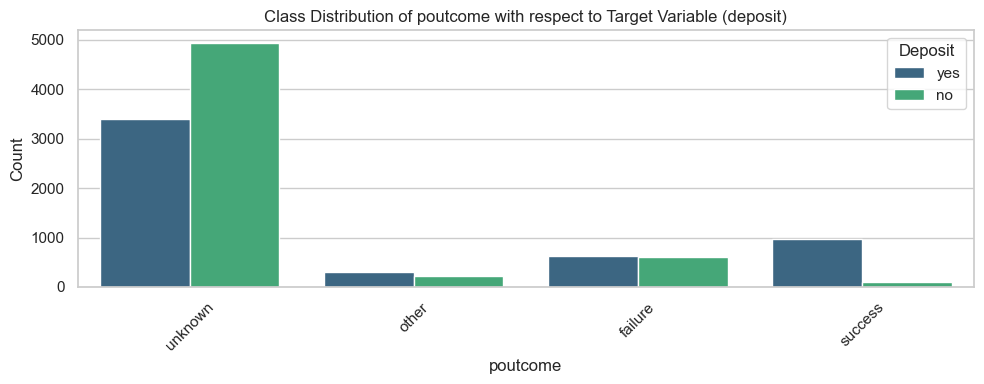

In [13]:
## YOUR CODE HERE

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

sns.set(style="whitegrid")

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=bank_df, x=col, hue='deposit', palette='viridis')
    plt.title(f'Class Distribution of {col} with respect to Target Variable (deposit)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Deposit')
    plt.tight_layout()
    plt.show()

**1.4: Explain the distribution of the target variable and the dataset.**


In [15]:
## YOUR COMMENT HERE

# The target variable (deposit) is reasonably balanced, with 52.62% of observations labeled 'no' and 47.38% labeled 'yes'. This suggests that both classes are well-represented.
# A class imbalance exists for the column ‘Default’  where the vast majority (98.49%) of values are 'no', while only a small fraction (1.51%) is 'yes'.
# In the column Poutcome, the 'unknown' category comprises a significant portion (74.59%), with other categories like 'failure', 'success', and 'other' being less frequent.


**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [17]:
## YOUR CODE HERE

X = bank_df.drop(['deposit', 'default','poutcome'], axis=1)  # Features
y = bank_df['deposit']               # Target variable

# Perform stratified split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
# The best approach for splitting the data into development (training) and test datasets is stratified sampling
# I chose this method since it ensures that each class is represented in the same proportion in both the training and test datasets as it is in the overall dataset

**1.6: Would you drop any column? Justify your reasoning.**

**Preprocess the data (Handle the Categorical Variable). Would you consider a mix of encoding techniques? Justify.
Do we need to apply scaling? Briefly Justify**



In [20]:
#  In the above code cell, I dropped 2 columns - 'default' and 'poutcome'.
# 'Default' is highly imbalanced, which suggests that it may not provide much value to the model. The model might learn to always predict 'no', offering limited predictive power.
# In 'Poutcome', the category 'unknown' has a significant presence (75%), thus too much information is lacking in this particular column, it would contribute to unnecessary noise. 

In [21]:
## YOUR CODE HERE


categorical_features = ['marital', 'education', 'housing', 'loan', 'contact', 'month']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Define target feature for target encoding
nominal_feature = ['job']
t = TargetEncoder(smooth="auto")

# Ordinal encode 'month'
ordinal_features = ['month']
ordinal_encoder = OrdinalEncoder()

# One-hot encode all other categorical features
one_hot_features = [col for col in categorical_features if col not in ordinal_features]
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to handle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('target', t, nominal_feature),  # Apply target encoding
        ('onehot', one_hot_encoder, one_hot_features),
        ('ordinal', ordinal_encoder, ordinal_features),
        ('numeric', 'passthrough', numerical_features)
    ]
)


**1.7: Fit a Decision Tree on the development data until all leaves are pure. Which scoring metric will you prefer, and why? What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [23]:
# F1 Score is the preferred metric as it balances precision and recall and is particularly useful when dealing with imbalanced datasets. 
# If one class (e.g., "no") is much more common than the other (e.g., "yes"), accuracy alone might be misleading. 
# The F1 score also helps capture the performance of the model on the minority class by considering both false positives and false negatives

In [24]:
## YOUR CODE HERE

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth= None, random_state=42))
])


pipeline.fit(X_dev, y_dev)

# Predict on the training and test sets
y_dev_pred = pipeline.predict(X_dev)
y_test_pred = pipeline.predict(X_test)

# Calculate Accuracy and F1-score for training set
train_accuracy = accuracy_score(y_dev, y_dev_pred)
train_f1 = f1_score(y_dev, y_dev_pred, pos_label='yes')

# Calculate Accuracy and F1-score for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, pos_label='yes')

# Print the results
print(f"Training Set Performance:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"F1-score: {train_f1:.2f}\n")

print(f"Test Set Performance:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"F1-score: {test_f1:.2f}")

Training Set Performance:
Accuracy: 0.98
F1-score: 0.98

Test Set Performance:
Accuracy: 0.78
F1-score: 0.77


**1.8: Visualize the trained tree until the suitable max_depth.**

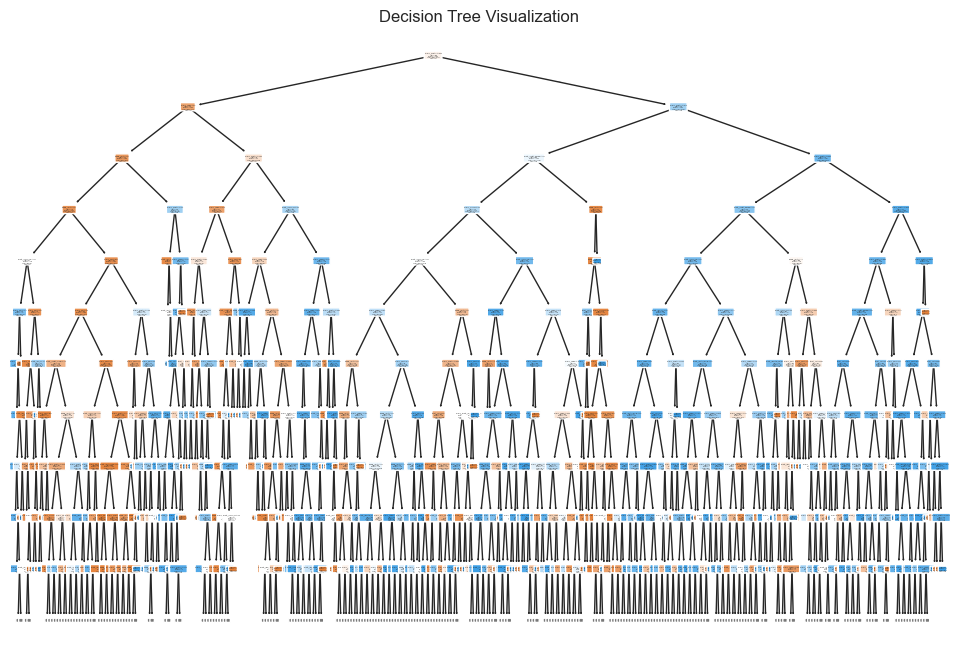

In [26]:
## YOUR CODE HERE

decision_tree = pipeline.named_steps['classifier']

# Visualize the trained decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    decision_tree,
    feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out(),  
    class_names=['no', 'yes'], 
    filled=True,
    rounded=True,
    max_depth=10 
)
plt.title('Decision Tree Visualization')
plt.show()

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

In [28]:
## YOUR CODE HERE
# Fit the pipeline on the training data
pipeline.fit(X_dev, y_dev)

# Extract the classifier from the pipeline
decision_tree = pipeline.named_steps['classifier']

# Preprocess X_dev to get the transformed features
X_dev_transformed = pipeline.named_steps['preprocessor'].transform(X_dev)

# Compute the cost complexity pruning path using transformed data
path = decision_tree.cost_complexity_pruning_path(X_dev_transformed, y_dev)  
ccp_alphas = path.ccp_alphas  # List of alphas
impurities = path.impurities  # Corresponding impurities

# Train a decision tree for each alpha
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_dev_transformed, y_dev)  # Use transformed training data
    trees.append(tree)

# Evaluate performance of each tree on the test set
test_scores = []
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)  # Transform test data
for tree in trees:
    y_test_pred = tree.predict(X_test_transformed)  # Use transformed test data
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, pos_label='yes')
    test_scores.append((accuracy, f1))

# Identify the optimal alpha
best_index = np.argmax([score[1] for score in test_scores])  # based on F1 score
best_alpha = ccp_alphas[best_index]
best_tree = trees[best_index]

# Print optimal alpha
print(f'Optimal alpha for pruning: {best_alpha:.5f}')

# Evaluate the performance of the best pruned tree
y_test_pred = best_tree.predict(X_test_transformed)  # Use transformed test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, pos_label='yes')

# Print the performance metrics for the best pruned tree
print(f'Test Set Performance after Pruning:')
print(f'Accuracy: {test_accuracy:.2f}')
print(f'F1-score: {test_f1:.2f}')

Optimal alpha for pruning: 0.00042
Test Set Performance after Pruning:
Accuracy: 0.84
F1-score: 0.84


In [29]:
# The performance has improved after pruning.

**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [31]:
## YOUR CODE HERE

# Get the trained decision tree from the pipeline
best_tree = pipeline.named_steps['classifier']  # Get the Random Forest classifier from the pipeline

# Get feature importances from the trained Random Forest model
importances = best_tree.feature_importances_

# Get the feature names after preprocessing
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Clean up the feature names by removing prefixes
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.replace(r'^(numeric__|onehot__|ordinal__)', '', regex=True)

# Sort the DataFrame by importance scores in descending order
sorted_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 3 features
top_3_features = sorted_importance_df.head(3)
print("Top 3 Most Important Features:")
print(top_3_features)


Top 3 Most Important Features:
     Feature  Importance
19  duration    0.356178
15     month    0.101762
21     pdays    0.086864


In [32]:
# Thus as per the decision tree, duration, month and balance are the top 3 features. They contribute maximum importance to the decision tree.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [35]:
## YOUR CODE HERE


pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Use the existing preprocessor
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Fit the model on the development dataset
pipeline_rf.fit(X_dev, y_dev)

# Predict on the test set
y_test_pred_rf = pipeline_rf.predict(X_test)

# Calculate Accuracy and F1-score for the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf, pos_label='yes')

# Print the results for Random Forest
print(f"Random Forest Test Set Performance:")
print(f"Accuracy: {test_accuracy_rf:.2f}")
print(f"F1-score: {test_f1_rf:.2f}\n")

# Assuming you have stored the Decision Tree results in variables
# Replace the following values with the actual Decision Tree test results
test_accuracy_dt = 0.85  # Replace with your actual Decision Tree test accuracy
test_f1_dt = 0.75        # Replace with your actual Decision Tree test F1 score

print(f"Decision Tree Test Set Performance:")
print(f"Accuracy: {test_accuracy_dt:.2f}")
print(f"F1-score: {test_f1_dt:.2f}\n")


Random Forest Test Set Performance:
Accuracy: 0.84
F1-score: 0.84

Decision Tree Test Set Performance:
Accuracy: 0.85
F1-score: 0.75



In [36]:
# The accuracy and F1 score of this model is higher than that of the decision tree in Q.1.7
# Hence, this model performs better.

**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [38]:
## YOUR CODE HERE

label_encoder = LabelEncoder()
y_dev = label_encoder.fit_transform(y_dev)  # 'yes' -> 1, 'no' -> 0
y_test = label_encoder.transform(y_test)

# Fit the model on the development dataset with the updated labels
pipeline_rf.fit(X_dev, y_dev)

# Verify if all trees have pure leaves
random_forest = pipeline_rf.named_steps['classifier']

all_trees_have_pure_leaves = True

for i, tree in enumerate(random_forest.estimators_):
    # Get the leaves of the current tree for the training data
    leaves = tree.apply(pipeline_rf.named_steps['preprocessor'].transform(X_dev))  # Preprocess and get leaf indices

    # Count the samples in each leaf
    leaf_counts = np.bincount(leaves)

    # Check if any leaf has mixed labels
    for leaf_index in range(len(leaf_counts)):
        samples_in_leaf = (leaves == leaf_index)
        if len(np.unique(y_dev[samples_in_leaf])) > 1:
            all_trees_have_pure_leaves = False
            break
    if not all_trees_have_pure_leaves:
        break

if all_trees_have_pure_leaves:
    print("All trees in the Random Forest have pure leaves.")
else:
    print("Not all trees in the Random Forest have pure leaves.")

# Mean accuracy of individual trees in the Random Forest
tree_accuracies = [tree.score(pipeline_rf.named_steps['preprocessor'].transform(X_dev), y_dev) for tree in random_forest.estimators_]
mean_accuracy = np.mean(tree_accuracies)
print(f"Mean accuracy of individual trees in the Random Forest: {mean_accuracy:.2f}")

Not all trees in the Random Forest have pure leaves.
Mean accuracy of individual trees in the Random Forest: 0.89


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [40]:
## YOUR SOLUTION HERE

# n_estimators: Tuning this parameter helps determine the number of decision trees in the forest, directly influencing the robustness and ensemble effect.
# max_depth: Controls how complex the individual trees are, helping strike a balance between underfitting and overfitting.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [42]:
## YOUR SOLUTION HERE

# For n_estimators, I would choose values across a broad range to understand the point where additional trees yield diminishing returns. [ 100, 200, 300, 400, 500]
# The values chosen for max_features (0.5, 0.6, 0.7, 'sqrt', 'log2') are intended to balance model performance and generalization in a Random Forest. Fractional values (0.5 to 0.7) allow for varying proportions of features at each split, promoting diversity among trees while reducing overfitting.
# The string options, 'sqrt' (the default) and 'log2', further enhance randomness, especially in high-dimensional datasets, helping to create uncorrelated trees and improve model robustness. 

**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [44]:
## YOUR CODE HERE

n_estimators = [100, 200, 300, 400, 500]
max_features = [0.5,0.6,0.7, 'sqrt', 'log2']  # You can also include integer values like 1, 2, etc.

# Initialize lists to store OOB scores and model performance
oob_scores = []
train_scores = []
test_scores = []

# Loop through combinations of n_estimators and max_features
for estimators in n_estimators:
    for max_feat in max_features:
        # Create and fit the Random Forest model
        pipeline_rf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(n_estimators=estimators, 
                                                  max_features=max_feat, 
                                                  oob_score=True, 
                                                  random_state=42))
        ])
        
        pipeline_rf.fit(X_dev, y_dev)
        
        # Append training and testing scores
        train_scores.append(pipeline_rf.score(X_dev, y_dev))
        test_scores.append(pipeline_rf.score(X_test, y_test))
        
        rf = pipeline_rf.named_steps['classifier']
        oob_scores.append(rf.oob_score_)

# Determine the best hyperparameters based on OOB score
best_index = oob_scores.index(max(oob_scores))
best_n_estimators = n_estimators[best_index // len(max_features)]
best_max_features = max_features[best_index % len(max_features)]

# Fit the best pipeline with the optimal hyperparameters
best_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=best_n_estimators, 
                                          max_features=best_max_features, 
                                          random_state=42))
])      

best_pipeline_rf.fit(X_dev, y_dev)

# Print the performance of the best model
dev_accuracy = best_pipeline_rf.score(X_dev, y_dev)
test_accuracy = best_pipeline_rf.score(X_test, y_test)
print(f"Optimal Hyperparameters: n_estimators={best_n_estimators}, max_features={best_max_features}")
print(f"Development Set Accuracy: {dev_accuracy:.4f}, Test Set Accuracy: {test_accuracy:.4f}")

Optimal Hyperparameters: n_estimators=300, max_features=0.6
Development Set Accuracy: 0.9961, Test Set Accuracy: 0.8455


In [45]:
# The performance has slightly increased compared to Q.2.1 as seen in a slight increase in test accuracy.

 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

In [47]:
## YOUR CODE HERE
best_pipeline_rf.fit(X_dev, y_dev)

# Get the fitted classifier from the pipeline
rf = best_pipeline_rf.named_steps['classifier']

# Get feature importances
importances = rf.feature_importances_

# Get the feature names from the preprocessor
# The preprocessor is a ColumnTransformer, so we need to extract the feature names accordingly
# Transform X_dev to get the feature names after preprocessing
X_dev_transformed = best_pipeline_rf.named_steps['preprocessor'].transform(X_dev)

# Get the feature names from the preprocessor
# Note: You may need to adjust this part depending on how you set up your preprocessor
if hasattr(best_pipeline_rf.named_steps['preprocessor'], 'get_feature_names_out'):
    feature_names = best_pipeline_rf.named_steps['preprocessor'].get_feature_names_out()
else:
    feature_names = []

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.replace(r'^(numeric__|onehot__|ordinal__)', '', regex=True)
# Sort the DataFrame by importance
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(3)

# Print the top 3 features
print("Top 3 Important Features:")
print(top_features)


Top 3 Important Features:
     Feature  Importance
19  duration    0.371499
15     month    0.084954
17   balance    0.082435


In [48]:
# No change in the top 3 features, compared to Q.1.10

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [51]:
## YOUR CODE HERE

param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_iter': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
}

# Create the pipeline
pipeline_hgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(random_state=42))
])

# Start timing the model selection process
start_time = time.time()

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_hgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_dev, y_dev)

# Stop timing
end_time = time.time()
time_taken = end_time - start_time

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

# Report results
print(f"Time taken for model selection: {time_taken:.2f} seconds")
print(f"Best Hyperparameters: {best_params}")
print(f"Best Development Set Accuracy: {best_score:.4f}")
print(f"Test Set Accuracy of the Optimal Model: {test_accuracy:.4f}")

Time taken for model selection: 31.39 seconds
Best Hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__max_iter': 100}
Best Development Set Accuracy: 0.8555
Test Set Accuracy of the Optimal Model: 0.8562


**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT HAVE TO** choose the same hyperparameters as HistGradientBoostingClassifier.

In [105]:
## YOUR CODE HERE
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
}

# Create the pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),  # The preprocessor for handling categorical and numerical features
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Start timing the model selection process
start_time = time.time()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_dev, y_dev)

# Stop timing
end_time = time.time()
time_taken = end_time - start_time

# Get the best parameters and the best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

# Evaluate the best model on the test set
best_model_xgb = grid_search_xgb.best_estimator_
test_accuracy_xgb = best_model_xgb.score(X_test, y_test)

# Report results
print(f"Time taken for model selection with XGBoost: {time_taken:.2f} seconds")
print(f"Best Hyperparameters for XGBoost: {best_params_xgb}")
print(f"Best Development Set Accuracy: {best_score_xgb:.4f}")
print(f"Test Set Accuracy of the Optimal XGBoost Model: {test_accuracy_xgb:.4f}")


C:\Users\Floyd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:17:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Time taken for model selection with XGBoost: 23.36 seconds
Best Hyperparameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best Development Set Accuracy: 0.8566
Test Set Accuracy of the Optimal XGBoost Model: 0.8571


**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

In [3]:
# Both the results are nearly the same, hence no preference between the 2 models.

**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

Top 3 Most Important Features (Cleaned):
            Feature  Importance
14  contact_unknown    0.227594
19         duration    0.133697
8        housing_no    0.131241


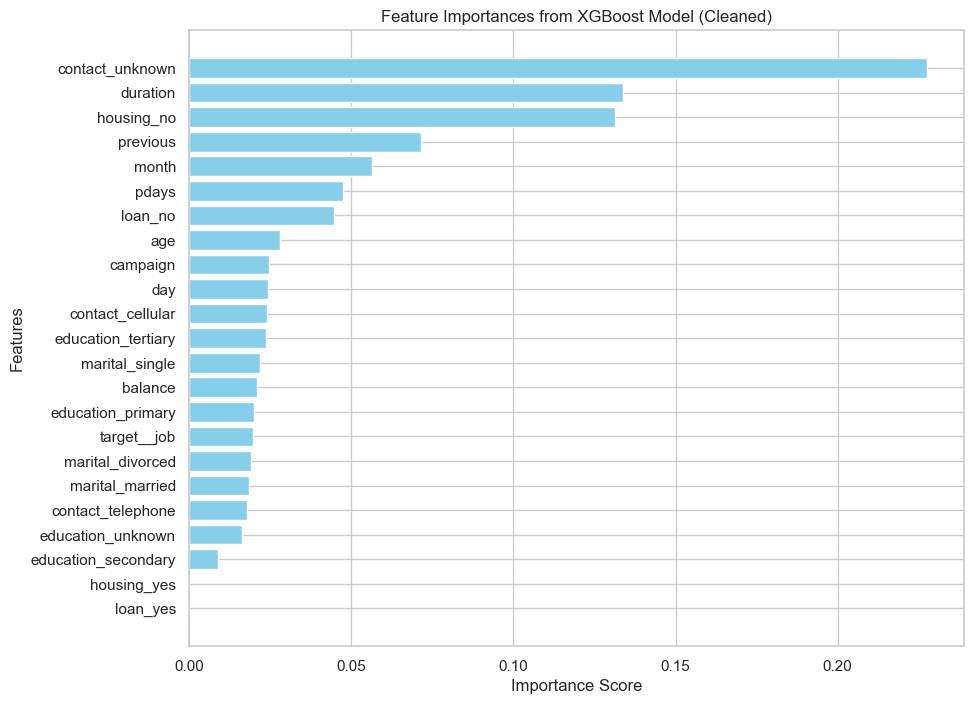

In [58]:
## YOUR CODE HERE
xgb_model = best_model_xgb.named_steps['classifier']

# Get the feature importances from the trained XGBClassifier
feature_importances = xgb_model.feature_importances_

# Extract feature names
feature_names = pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Clean the feature names by removing prefixes
importance_df['Feature'] = importance_df['Feature'].str.replace(r'^(numeric__|onehot__|ordinal__)', '', regex=True)

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 3 most important features without prefixes
top_3_features = importance_df.head(3)
print("Top 3 Most Important Features (Cleaned):")
print(top_3_features)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from XGBoost Model (Cleaned)')
plt.gca().invert_yaxis()  # Display the most important feature at the top
plt.show()

In [59]:
# duration is the only common top 3 feature in all the 3 models. 
# For XGBoost model, contact_unknown and housing_no are new occurences in the top 3, having not been present in Decision Tree and Random Forest.

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [61]:
## YOUR CODE HERE

top_5_features = ['onehot__contact_unknown', 'numeric__duration', 'onehot__housing_no', 'numeric__previous', 'ordinal__month']

X_dev_transformed = pipeline_xgb.named_steps['preprocessor'].transform(X_dev)
X_test_transformed = pipeline_xgb.named_steps['preprocessor'].transform(X_test)

# Create DataFrames from the transformed data and select top 5 features
X_dev_top5 = pd.DataFrame(X_dev_transformed, columns=feature_names)[top_5_features]
X_test_top5 = pd.DataFrame(X_test_transformed, columns=feature_names)[top_5_features]

# Define a new parameter grid for hyperparameter tuning
param_grid_top5 = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
}

# Create a new pipeline with only the top 5 features
pipeline_xgb_top5 = Pipeline(steps=[
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Start timing the model selection process for top 5 features
start_time_top5 = time.time()

# Perform grid search with cross-validation on the top 5 features
grid_search_xgb_top5 = GridSearchCV(pipeline_xgb_top5, param_grid_top5, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb_top5.fit(X_dev_top5, y_dev)

# Stop timing
end_time_top5 = time.time()
time_taken_top5 = end_time_top5 - start_time_top5

# Get the best parameters and the best score for the model with top 5 features
best_params_xgb_top5 = grid_search_xgb_top5.best_params_
best_score_xgb_top5 = grid_search_xgb_top5.best_score_

# Evaluate the best model on the test set
best_model_xgb_top5 = grid_search_xgb_top5.best_estimator_
test_accuracy_xgb_top5 = best_model_xgb_top5.score(X_test_top5, y_test)

# Report results for the model with top 5 features
print(f"Time taken for model selection with XGBoost using Top 5 Features: {time_taken_top5:.2f} seconds")
print(f"Best Hyperparameters for XGBoost with Top 5 Features: {best_params_xgb_top5}")
print(f"Best Development Set Accuracy with Top 5 Features: {best_score_xgb_top5:.4f}")
print(f"Test Set Accuracy of the Optimal XGBoost Model with Top 5 Features: {test_accuracy_xgb_top5:.4f}")

Time taken for model selection with XGBoost using Top 5 Features: 7.03 seconds
Best Hyperparameters for XGBoost with Top 5 Features: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Best Development Set Accuracy with Top 5 Features: 0.8326
Test Set Accuracy of the Optimal XGBoost Model with Top 5 Features: 0.8361


C:\Users\Floyd\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:06:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [64]:
## YOUR CODE HERE

**4.2: Calibrate the trained XGBoost model using isotonic regression. Print the brier score after calibration and plot predicted v.s. actual on test datasets from the calibration method.**

In [66]:
## YOUR CODE HERE

**4.3: Compare the brier scores from 4.1 and 4.2. Do the calibration methods help in having better predicted probabilities?**

Your Comments Here